In [1]:
import pandas as pd 

from porise.model.algorithms.mab import BetaThompsonSampling
from porise.envs.real import ChainOfferEnvV2
from porise import Simulator

In [2]:
df = pd.read_csv('../porise/data/exp5217_all_imp100_scaled_train_new.csv')
print("cdna user features loaded")
df = df.set_index('easy_id')
user_map = df.T.to_dict('list')
print('get user map ready')

cdna user features loaded
get user map ready


In [6]:
env = ChainOfferEnvV2(rat_log_path='../porise/data/sampled_rat_log_exp5217.csv', user_vectors_map=user_map)

In [7]:
model = BetaThompsonSampling(
            n_arms=env.n_arms,
            return_list=False
        )

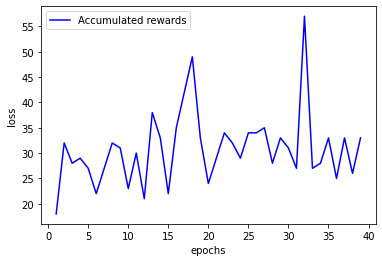

400000it [06:37, 1005.11it/s, total reward=1231.0]                            


In [8]:
simulator = Simulator(model=model,
                     env=env,
                     train_every=int(128),
                     throttle=int(1e2),
                     memory_capacity=int(128),
                     plot_every=int(1e4))
simulator.run()

In [9]:
import numpy as np
np.save('results/sampled_log_ts.npy', simulator.rewards)

In [10]:
simulator.rewards.sum()

1232.0